## Step 5: Load Clean Data and Explore Summary Statistics

Now that we’ve finished cleaning the data in the ETL phase, we can load the saved version and begin our Exploratory Data Analysis (EDA).

In this step, we:
- Load the cleaned dataset.
- Review summary statistics for both numeric and categorical features.
- Visualize distributions of important numeric variables.

This helps us understand patterns in the data and prepares us for deeper analysis.


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("images", exist_ok=True)

In [24]:
df = pd.read_csv("../data/inputs/cleaned/uci_credit_card_cleaned.csv")
df.head()

,id,limit_bal,sex,education,marriage,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,...,bill_amount_jun,bill_amount_may,bill_amount_apr,payment_amount_sep,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default.payment.next.month
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [25]:
# View structure and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          30000 non-null  int64  
 1   limit_bal                   30000 non-null  float64
 2   sex                         30000 non-null  object 
 3   education                   29986 non-null  object 
 4   marriage                    29946 non-null  object 
 5   age                         30000 non-null  int64  
 6   pay_delay_sep               30000 non-null  int64  
 7   pay_delay_aug               30000 non-null  int64  
 8   pay_delay_jul               30000 non-null  int64  
 9   pay_delay_jun               30000 non-null  int64  
 10  pay_delay_may               30000 non-null  int64  
 11  pay_delay_apr               30000 non-null  int64  
 12  bill_amount_sep             30000 non-null  float64
 13  bill_amount_aug             300

In [26]:
# Summary statistics for numerical features
df.describe()

,id,limit_bal,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,pay_delay_may,pay_delay_apr,bill_amount_sep,...,bill_amount_jun,bill_amount_may,bill_amount_apr,payment_amount_sep,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [33]:
# Summary for categorical features
df.describe(include='category')

,sex,education,marriage
count,30000,29986,29946
unique,2,5,3
top,female,university,single
freq,18112,14030,15964


<Axes: >

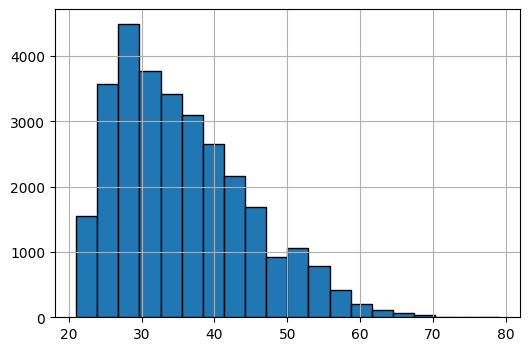

In [34]:
# Example distribution: Age
df["age"].hist(bins=20, edgecolor='black', figsize=(6, 4))

<Axes: >

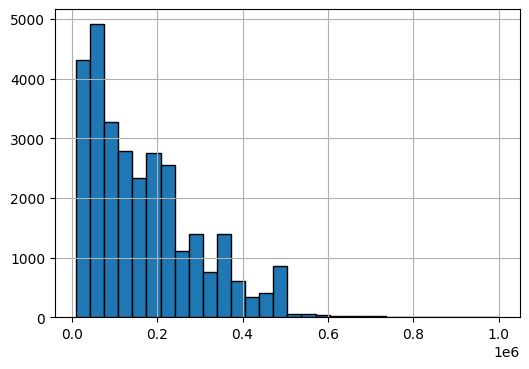

In [37]:
# Example distribution: Limit Balance
df['limit_bal'].hist(bins=30, edgecolor='black', figsize=(6, 4))

## Step 6: Visualizing Distributions of Numeric Features

In this step, we visualized the distributions of two key numerical features: **age** and **limit balance**.

### 📊 Age Distribution

- The histogram of the `age` feature shows how customers are spread across different age groups.
- Most customers fall within the **25–40 age range**, suggesting a younger client base.
- There are fewer clients above the age of 60, and very few outliers under 20 or over 75.
- This helps us understand the demographics of the clients and can be useful when segmenting risk groups.

### 💳 Credit Limit Distribution

- The `limit_balance` histogram displays how credit limits are distributed among customers.
- The distribution is **right-skewed**: most clients have lower credit limits (under 200,000), while a few have very high limits (up to 1,000,000).
- This is important for detecting **outliers** and understanding the overall financial exposure of the bank.

Understanding these patterns allows us to:
- Detect possible anomalies or skewed distributions
- Decide whether we need **scaling or binning** before modeling
- Know which ranges to focus on during risk analysis and visual dashboarding


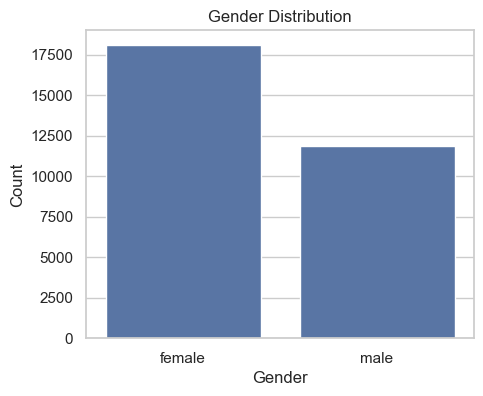

In [42]:
# Set plot style
sns.set(style="whitegrid")

# Plot: Gender
plt.figure(figsize=(5, 4))
sns.countplot(x="sex", data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("../assets/plots/gender_distribution.png")
plt.show()

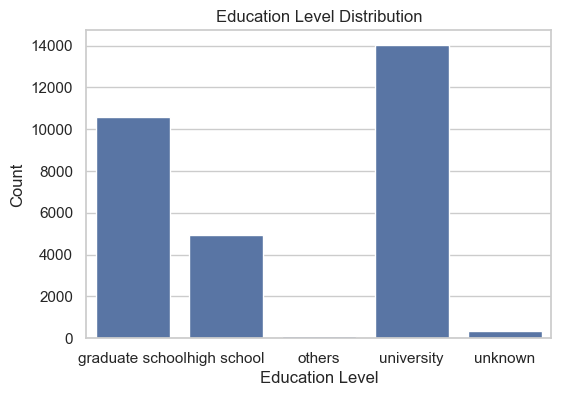

In [41]:
# Plot: Education
plt.figure(figsize=(6, 4))
sns.countplot(x="education", data=df)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.savefig("../assets/plots/education_distribution.png")
plt.show()

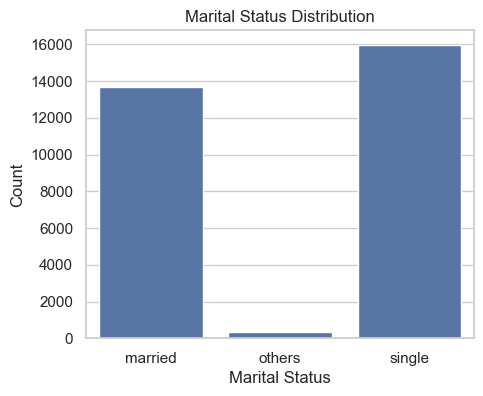

In [43]:
# Plot: Marital Status
plt.figure(figsize=(5, 4))
sns.countplot(x="marriage", data=df)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.savefig("../assets/plots/marital_status_distribution.png")
plt.show()